# Scientific Computing with Python (Second Edition)
# Chapter 10

We start by importing all from Numpy. As explained in Chapter 01 the examples are written assuming this import is initially done. Furthermore, we import pandas.


In [1]:
from numpy import *
import pandas as pd
%matplotlib notebook

## 10. 1 A guiding example: Solar cells

For the rest of the chapter it is required that you have downloaded the files `solar.dat`, `rates.dat`, and `solarWatts.dat`. Safe them in the *same folder* as this notebook file.

*There is no code in this section.*

## 10.2 NumPy arrays and pandas dataframes

In [2]:
A=array( [[ 1., 2., 3.],
           [4., 5., 6.]])
A

array([[1., 2., 3.],
       [4., 5., 6.]])

In [3]:
import pandas as pd
A=array( [[ 1., 2., 3.],
          [ 4., 5., 6.]] )
AF = pd.DataFrame(A)
AF

,0,1,2
0,1.0,2.0,3.0
1,4.0,5.0,6.0


In [4]:
AF.columns = ['C1','C2','C3']     
AF.index = ['R1', 'R2']
AF

,C1,C2,C3
R1,1.0,2.0,3.0
R2,4.0,5.0,6.0


### 10.2.1 Indexing rules

In [5]:
AF.loc['R1', 'C2']

2.0

In [6]:
AF.loc[['R1','R2'],['C1','C2']]

,C1,C2
R1,1.0,2.0
R2,4.0,5.0


In [7]:
AF.loc['R1']

C1    1.0
C2    2.0
C3    3.0
Name: R1, dtype: float64

In [8]:
AF.loc['R1'].loc['C1']    # returns 1.0

1.0

In [9]:
AF['C1']

R1    1.0
R2    4.0
Name: C1, dtype: float64

In [10]:
AF.C1

R1    1.0
R2    4.0
Name: C1, dtype: float64

In [11]:
AF.iloc[[0],[1]]

,C2
R1,2.0


In [12]:
AF.loc['R1':,'C2':] 

,C2,C3
R1,2.0,3.0
R2,5.0,6.0


In [13]:
AF.loc[['R1','R2'], ['C2','C2']]

,C2,C2
R1,2.0,2.0
R2,5.0,5.0


In [14]:
AF.loc['R1','C2'] # returns 2.0

2.0

## 10.3 Creating and modifying dataframes
### 10.3.1 Creating a dataframe from imported data

In [15]:
solarWatts = pd.read_csv("solarWatts.dat", 
                         sep=';',
                         index_col='Date',
                         parse_dates=[0], infer_datetime_format=True)

In [16]:
solarWatts.loc['2020-07-01 7:00':'2020-07-01 7:04']

,Watt
Date,
2020-07-01 07:00:00,2254.0
2020-07-01 07:01:00,1420.0
2020-07-01 07:02:00,2364.0
2020-07-01 07:03:00,762.0
2020-07-01 07:04:00,2568.0


In [17]:
solarWatts.iloc[0] 

Watt    7893.0
Name: 2019-10-06 13:23:00, dtype: float64

In [18]:
solarWatts.index[-1]   # asking for the last index

Timestamp('2020-07-02 19:59:00')

In [19]:
solarWatts.index[1]-solarWatts.index[0]

Timedelta('0 days 00:01:00')

In [20]:
max(diff(solarWatts.index).astype('timedelta64[m]'))

numpy.timedelta64(9532,'m')

In [21]:
solarWatts.iloc[argmax(diff(solarWatts.index))]

Watt   NaN
Name: 2019-10-01 00:00:00, dtype: float64

### 10.3.2 Setting the index

In [22]:
towns=[['Stockholm', 'Sweden', 188,975904],
       ['Malmö', 'Sweden', 322, 316588],
       ['Oslo', 'Norway', 481, 693491],
       ['Bergen', 'Norway', 464, 28392]]
town=pd.DataFrame(towns, columns=['City','Country','area','population'])

In [23]:
town.set_index('City', drop=False)      # duplicating
# droping the column and making an index out of it
town.set_index('City', drop=True)

,Country,area,population
City,,,
Stockholm,Sweden,188,975904
Malmö,Sweden,322,316588
Oslo,Norway,481,693491
Bergen,Norway,464,28392


In [24]:
town.set_index(['Country','City'], inplace=True)
town

area  population
Country City                       
Sweden  Stockholm   188      975904
        Malmö       322      316588
Norway  Oslo        481      693491
        Bergen      464       28392

In [25]:
town.loc['Sweden']

,area,population
City,,
Stockholm,188,975904
Malmö,322,316588


In [26]:
town.loc[('Sweden','Malmö')]

area             322
population    316588
Name: (Sweden, Malmö), dtype: int64

### 10.3.3 Deleting entries

As we changed for some code demonstration the DataFrame at the end of the last section, we restore it in its original form before we start with the topic of this section.

In [27]:
town=pd.DataFrame(towns, columns=['City','Country','area','population'])
town.set_index('City', inplace=True)
town

,Country,area,population
City,,,
Stockholm,Sweden,188,975904
Malmö,Sweden,322,316588
Oslo,Norway,481,693491
Bergen,Norway,464,28392


In [28]:
town.drop('Bergen', axis=0)

,Country,area,population
City,,,
Stockholm,Sweden,188,975904
Malmö,Sweden,322,316588
Oslo,Norway,481,693491


In [29]:
town.drop('area', axis=1)

,Country,population
City,,
Stockholm,Sweden,975904
Malmö,Sweden,316588
Oslo,Norway,693491
Bergen,Norway,28392


### 10.3.4 Merging dataframes

In [30]:
price = pd.read_csv("price.dat", 
                         sep=';',
                         index_col='Date',
                         parse_dates=[0], infer_datetime_format=True)
rates = pd.read_csv("rates.dat", 
                         sep=';',
                         index_col='Date',
                         parse_dates=[0], infer_datetime_format=True)

In [31]:
price.iloc[0]

SEK    0.32322
Name: 2019-10-20 00:00:00, dtype: float64

In [32]:
solar_all=pd.merge(solarWatts, price, how='outer', sort=True, on='Date')
solar_all=pd.merge(solar_all, rates, how='outer', sort=True, on='Date')

In [33]:
#solar_all.loc['2019-10-06 15:03:00']

### 10.3.5 Missing data in a dataframe

In [34]:
frame = pd.DataFrame(array([[1., -5.,  3., NaN], 
                            [3.,  4., NaN, 17.], 
                            [6.,  8., 11.,  7.]]), 
                     columns=['a','b','c','d'])
frame

,a,b,c,d
0,1.0,-5.0,3.0,NaN
1,3.0,4.0,NaN,17.0
2,6.0,8.0,11.0,7.0


In [35]:
frame.dropna(axis=0)

,a,b,c,d
2,6.0,8.0,11.0,7.0


In [36]:
frame.dropna(axis=1)

,a,b
0,1.0,-5.0
1,3.0,4.0
2,6.0,8.0


In [37]:
frame.fillna(method='pad',axis=0)

,a,b,c,d
0,1.0,-5.0,3.0,NaN
1,3.0,4.0,3.0,17.0
2,6.0,8.0,11.0,7.0


In [38]:
frame.interpolate(axis=0, method='linear')

,a,b,c,d
0,1.0,-5.0,3.0,NaN
1,3.0,4.0,7.0,17.0
2,6.0,8.0,11.0,7.0


In [39]:
frame['c'].fillna(method='pad', inplace=True)
frame['d'].fillna(method='bfill',inplace=True)
frame

,a,b,c,d
0,1.0,-5.0,3.0,17.0
1,3.0,4.0,3.0,17.0
2,6.0,8.0,11.0,7.0


In [40]:
solar_all['SEK'].fillna(method='pad', axis=0, inplace=True)
solar_all['Euro_SEK'].fillna(method='pad', axis=0, inplace=True)

## 10.4 Working with dataframes
### 10.4.1 Plotting from dataframes

<IPython.core.display.Javascript object>


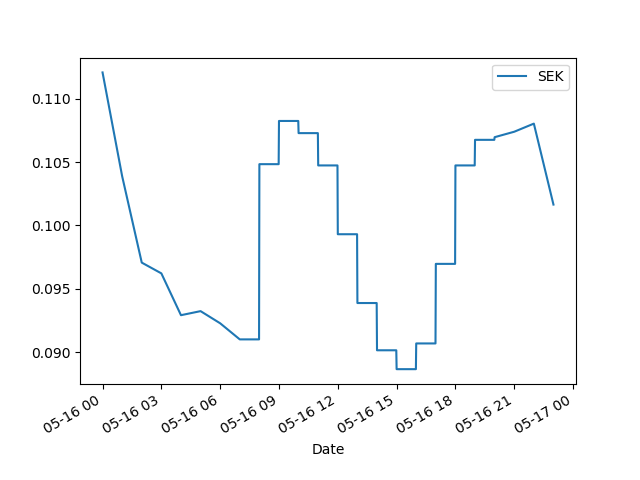

In [41]:
solar_all.loc['2020-05-16'].plot(y='SEK')

In [42]:
solar_all.loc['2020-05-16']

,Watt,SEK,Euro_SEK
Date,,,
2020-05-16 00:00:00,NaN,0.11208,10.669
2020-05-16 01:00:00,NaN,0.10389,10.669
2020-05-16 02:00:00,NaN,0.09707,10.669
2020-05-16 03:00:00,NaN,0.09622,10.669
2020-05-16 04:00:00,NaN,0.09292,10.669
...,...,...,...
2020-05-16 19:59:00,331.0,0.10676,10.669
2020-05-16 20:00:00,NaN,0.10697,10.669
2020-05-16 21:00:00,NaN,0.10740,10.669


<IPython.core.display.Javascript object>


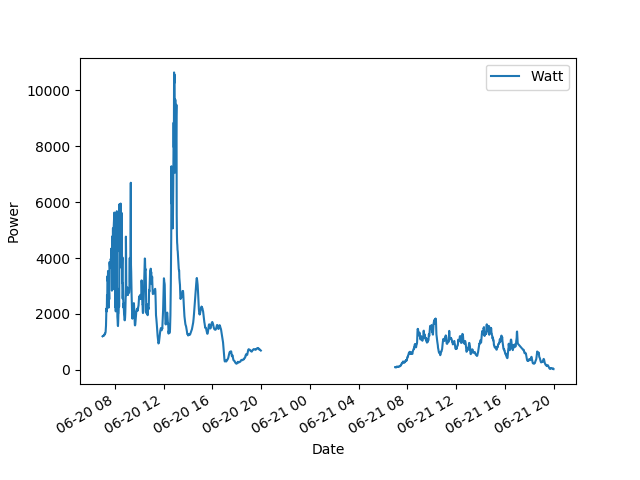

Text(0, 0.5, 'Power')

In [43]:
ax1=solar_all.loc['2020-06-20':'2020-06-21'].plot(None,'Watt')
ax1.set_ylabel('Power')

### 10.4.2 Calculations within dataframes

In [44]:
solar_converted=pd.DataFrame()
solar_converted['kW']=solar_all['Watt']/1000
solar_converted['Euro']=solar_all['SEK']/solar_all['Euro_SEK']

In [45]:
solar_converted.loc['2020-07-01 7:00':'2020-07-01 7:04']

,kW,Euro
Date,,
2020-07-01 07:00:00,2.254,0.037147
2020-07-01 07:01:00,1.420,0.037147
2020-07-01 07:02:00,2.364,0.037147
2020-07-01 07:03:00,0.762,0.037147
2020-07-01 07:04:00,2.568,0.037147


In [46]:
solar_all.loc['2020-07-01 7:00':'2020-07-01 7:04']

,Watt,SEK,Euro_SEK
Date,,,
2020-07-01 07:00:00,2254.0,0.38919,10.477
2020-07-01 07:01:00,1420.0,0.38919,10.477
2020-07-01 07:02:00,2364.0,0.38919,10.477
2020-07-01 07:03:00,762.0,0.38919,10.477
2020-07-01 07:04:00,2568.0,0.38919,10.477


In [47]:
import numpy
numpy.max(solar_all['Watt'])

12574.0

In [48]:
print(solar_all.index[argmax(solar_all['Watt'])])

2020-05-16 10:54:00


In [49]:
solar_all['Watt'].fillna(value=0., inplace=True)

### 10.4.3 Grouping data

In [50]:
solar_day=solar_all.groupby(solar_all.index.date).agg({'Watt':'max', 
                                                       'SEK':'mean'})

<IPython.core.display.Javascript object>


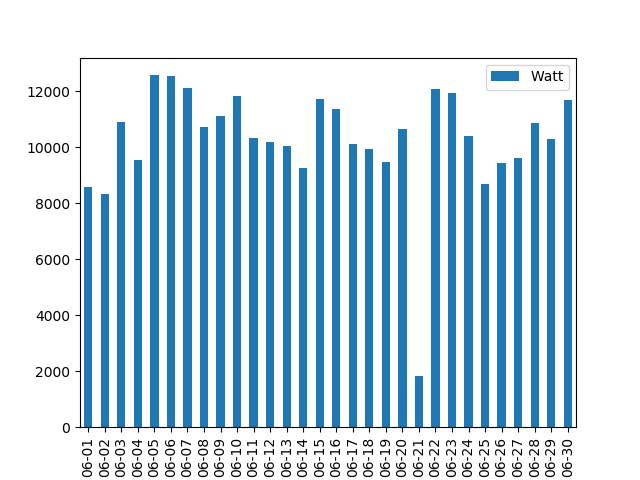

In [51]:
solar_day.index=pd.to_datetime(solar_day.index,format='%Y-%m-%d')
import matplotlib.pylab as pl
pl.figure(2)
ax=solar_day.loc['2020-06-01':'2020-06-30'].plot.bar(y='Watt')

Note, the x-axis ticklabels in this figure are set by the next command.

In [52]:
ax.set_xticklabels([tf.strftime("%m-%d") for tf in solar_day.loc['2020-06-01':'2020-06-30'].index])

[Text(0, 0, '06-01'),
 Text(0, 0, '06-02'),
 Text(0, 0, '06-03'),
 Text(0, 0, '06-04'),
 Text(0, 0, '06-05'),
 Text(0, 0, '06-06'),
 Text(0, 0, '06-07'),
 Text(0, 0, '06-08'),
 Text(0, 0, '06-09'),
 Text(0, 0, '06-10'),
 Text(0, 0, '06-11'),
 Text(0, 0, '06-12'),
 Text(0, 0, '06-13'),
 Text(0, 0, '06-14'),
 Text(0, 0, '06-15'),
 Text(0, 0, '06-16'),
 Text(0, 0, '06-17'),
 Text(0, 0, '06-18'),
 Text(0, 0, '06-19'),
 Text(0, 0, '06-20'),
 Text(0, 0, '06-21'),
 Text(0, 0, '06-22'),
 Text(0, 0, '06-23'),
 Text(0, 0, '06-24'),
 Text(0, 0, '06-25'),
 Text(0, 0, '06-26'),
 Text(0, 0, '06-27'),
 Text(0, 0, '06-28'),
 Text(0, 0, '06-29'),
 Text(0, 0, '06-30')]

<IPython.core.display.Javascript object>


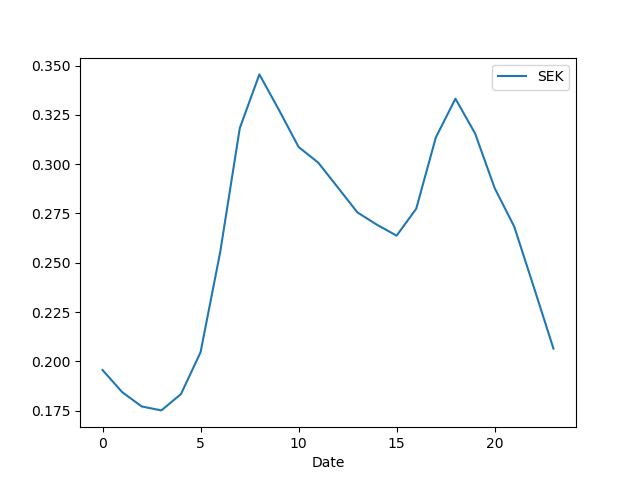

<IPython.core.display.Javascript object>


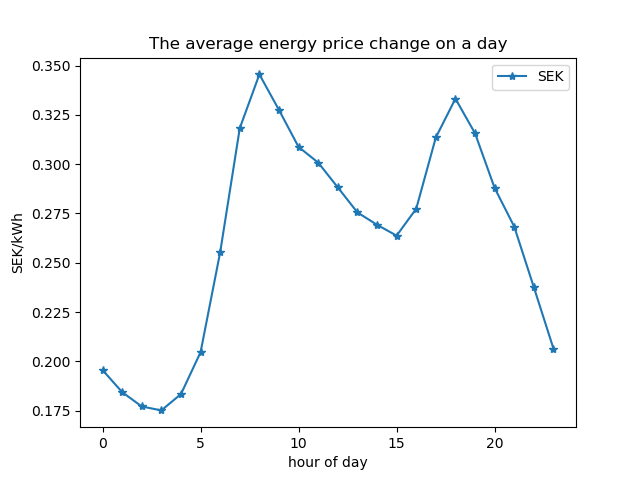

Text(0, 0.5, 'SEK/kWh')

In [53]:
solar_hour=solar_all.groupby(solar_all.index.hour).agg({'SEK':mean})
ax=solar_hour.plot()
ax=solar_hour.plot(marker='*')
ax.set_title('The average energy price change on a day')
ax.set_xlabel('hour of day')
ax.set_ylabel('SEK/kWh')

In [54]:
grouping_list=[solar_all.index.year, solar_all.index.month, 
               solar_all.index.day, solar_all.index.hour]
solar_hour=solar_all.groupby(grouping_list)

In [55]:
solar_hour=solar_hour.agg({'Watt':sum})
solar_hour=solar_hour/(1000*60)

<IPython.core.display.Javascript object>


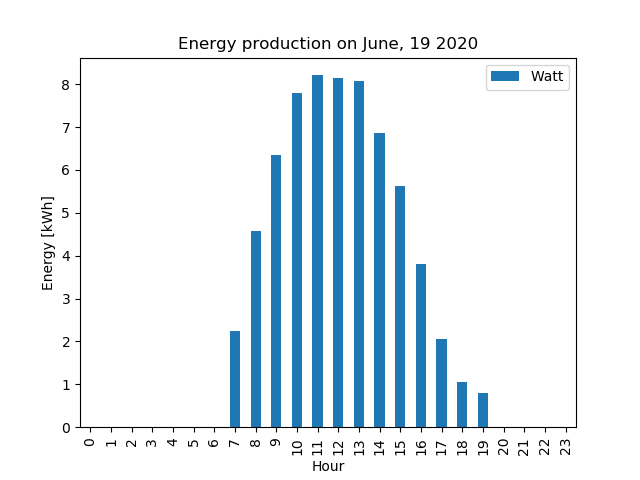

Text(0, 0.5, 'Energy [kWh]')

In [56]:
ax=solar_hour.loc[(2020,6,19)].plot.bar(y='Watt')
ax.set_title('Energy production on June, 19 2020')
ax.set_xlabel('Hour')
ax.set_ylabel('Energy [kWh]')

In [57]:
solar_hour.index

MultiIndex([(2019, 1,  2,  0),
            (2019, 1,  3,  0),
            (2019, 1,  4,  0),
            (2019, 1,  7,  0),
            (2019, 1,  8,  0),
            (2019, 1,  9,  0),
            (2019, 1, 10,  0),
            (2019, 1, 11,  0),
            (2019, 1, 14,  0),
            (2019, 1, 15,  0),
            ...
            (2020, 7,  2, 10),
            (2020, 7,  2, 11),
            (2020, 7,  2, 12),
            (2020, 7,  2, 13),
            (2020, 7,  2, 14),
            (2020, 7,  2, 15),
            (2020, 7,  2, 16),
            (2020, 7,  2, 17),
            (2020, 7,  2, 18),
            (2020, 7,  2, 19)],
           names=['Date', 'Date', 'Date', 'Date'], length=6538)